# Generalized linear model : gaussian family (linear regression)

In [183]:
# import all modules required for the analyses
import os
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import glm
from statsmodels.stats.api import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [184]:
try:
    dir_path = r"/Users/clement.guiraud/Desktop/Data analysis/Data analysis track/Linear Regression"
    os.chdir(dir_path)
except:
    dir_path = r"/Users/clement.guiraud/Desktop/Data analysis/Data analysis track/Linear Regression"
    os.chdir(dir_path)

In [185]:
# change working directory
os.getcwd()

'/Users/clement.guiraud/Desktop/Data analysis/Data analysis track/Linear Regression'

In [186]:
# read the Advertising data
raw_df = pd.read_csv("Advertising.csv", index_col=0)

In [187]:
# read the Advertising data
df = raw_df.copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### We want to predict the sales budget repartition for the three verticales

In [144]:
# check a basic statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


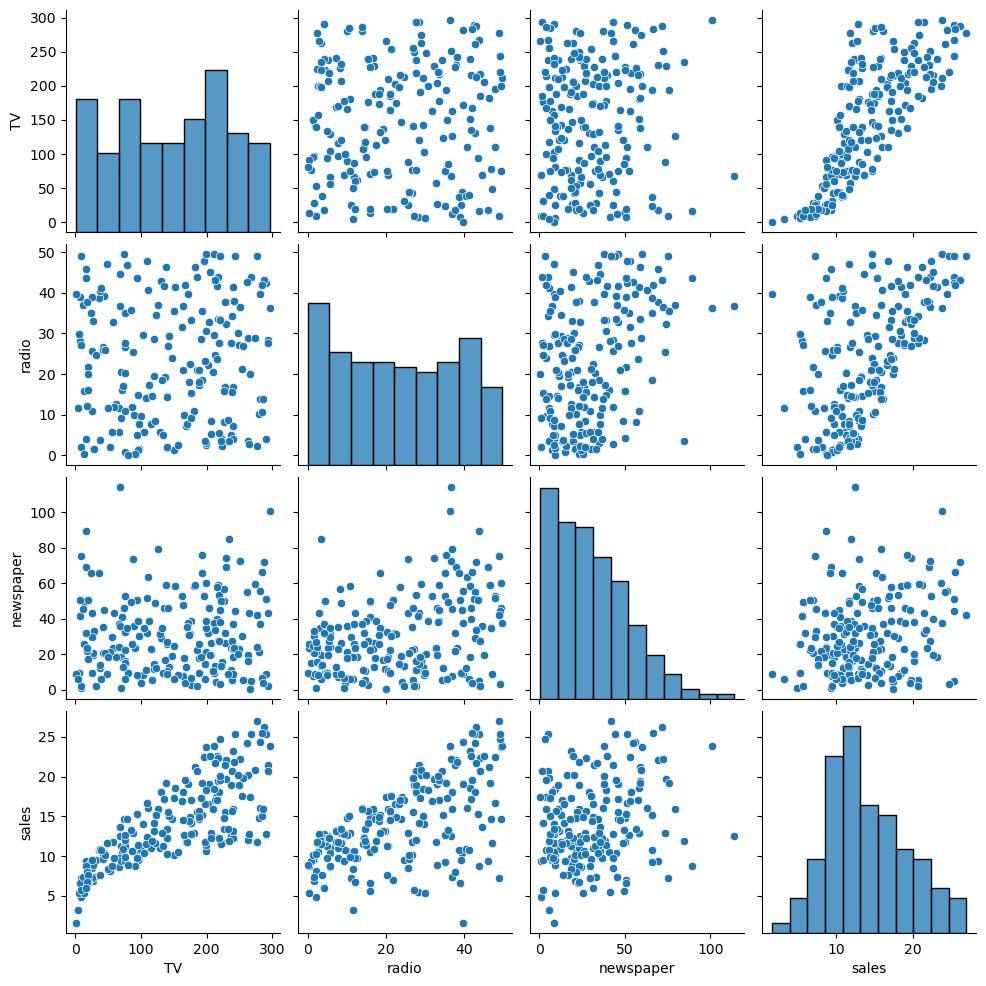

In [145]:
# descriptive statistics
sns.pairplot(df)
plt.show()

#### - TV might be pertinent, radio too (log type of scatterplot), no correlation with newspaper

## Linear regression using ordinary least square (classical linear regression modeling)

### One predictor

In [146]:
# run simple linear regression - basic api
X = df[['TV']]
y = df['sales']
model_1 = sm.OLS(y, sm.add_constant(X))
res_1 = model_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.47e-42
Time:                        11:25:06   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

#### we must look at the t test and the P value : the P value of the F statistic is 312 > to the p value (1.47e-42 < alpha) so the regression is pertinent 
#### R square : useful to see how good we do compared to the mean. 
#### the R square is significantly above 0, and above 0.5, but not above 1. So it's not good enough yet. 
the regression is pertinent ; we must now decide which predictor is relevant. Let's choose TV since this is the only predictor here. It's relevant because the Pi value of TV is way < 0.05. 

**If you wish to display the ANOVA table, you need to use the formula API**

In [147]:
resformula_1 = ols('sales ~ TV', data=df).fit()

In [148]:
# ANOVA Table for the fitted model
table = anova_lm(resformula_1)
print(table)

             df       sum_sq      mean_sq           F        PR(>F)
TV          1.0  3314.618167  3314.618167  312.144994  1.467390e-42
Residual  198.0  2102.530583    10.618841         NaN           NaN


### Two predictors

In [149]:
# run multiple regression with two predictors
X = df[['TV', 'radio']]
model_2 = sm.OLS(y, sm.add_constant(X)).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           4.83e-98
Time:                        11:25:06   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

1. pertinence of the model : we look at the p value of the F stat : 4.8e-98
2. are we close to the mean ? R square : 0.9 -> much better in predicting now we have 2 budgets
3. pi value : always 0 ; each predictor is pertinent here

In [150]:
resformula_2 = ols('sales ~ TV + radio', data=df).fit()

In [151]:
# ANOVA Table for the fitted model
table = anova_lm(resformula_2)
print(table)

             df       sum_sq      mean_sq            F        PR(>F)
TV          1.0  3314.618167  3314.618167  1172.496655  6.937160e-85
radio       1.0  1545.616603  1545.616603   546.738781  9.776972e-59
Residual  197.0   556.913980     2.826975          NaN           NaN


## Analysis
1. Pertinence of regression : P. value of F < alpha -> regression is pertinent 
2. Pertinence of predictors : TV and radio are pertinent 
                              P. value of t < alpha 
3. Meaning of coefficient :
    - when you increase TV budget by one unit (10k), sales will increase by 0.0458 units (4580€)
    - when you increase radio budget by one unit (10k€), sales will increase by by 0,1880 units (1880€-
4. Performance of the model : R2 = 0,896 (89,6%)
5. Most parcimonious model : lowest AIC and BIC 

### Three predictors

In [152]:
# run multiple regression with three predictors
X = df[['TV', 'radio', 'newspaper']]
model_3 = sm.OLS(y, sm.add_constant(X)).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        11:25:06   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

We added once again a predictor
1. F stat : pertinent because very low
2. R square : 0.9
3. p value much greater than alpha ; newspaper is non significant 

Maybe we can keep the model with 2 predictors because of parcimony : if with 3 predictors I can't get better results, we should keep the model with less predictors.

### To measure parcimony : AIC and BIC give parcimony : the lower the better

In [153]:
resformula_3 = ols('sales ~ TV + radio + newspaper', data=df).fit()

In [154]:
# ANOVA Table for the fitted model
table = anova_lm(resformula_3)
print(table)

              df       sum_sq      mean_sq            F        PR(>F)
TV           1.0  3314.618167  3314.618167  1166.730757  1.809337e-84
radio        1.0  1545.616603  1545.616603   544.050126  1.882722e-58
newspaper    1.0     0.088717     0.088717     0.031228  8.599151e-01
Residual   196.0   556.825263     2.840945          NaN           NaN


## Doing linear regression as a GLM model

In [155]:
model_glm = glm('sales ~ TV + radio + newspaper', data=df, family=sm.families.Gaussian()).fit()

In [156]:
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  sales   No. Observations:                  200
Model:                            GLM   Df Residuals:                      196
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          2.8409
Method:                          IRLS   Log-Likelihood:                -386.18
Date:                Wed, 22 Feb 2023   Deviance:                       556.83
Time:                        11:25:06   Pearson chi2:                     557.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9998
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.328       3.550
TV             0.0458      0.001     32.809      0.000       0.043       0.048
radio          0.1885      0.009     21.893      0.000       0.172       0.205
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.010
==============================================================================
"""

In [157]:
# calculate standardized residuals
fitted_values = model_glm.fittedvalues
std_residuals = model_glm.resid_pearson

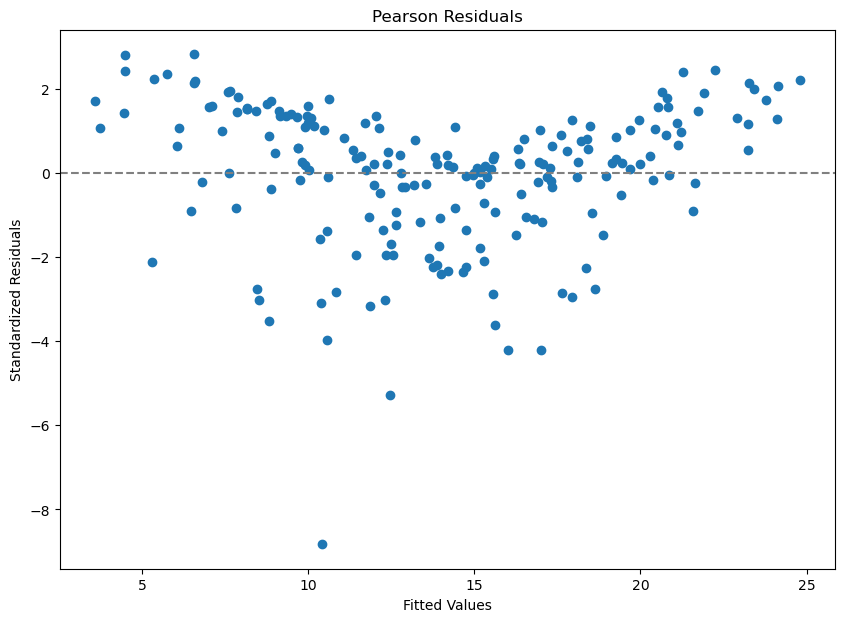

In [158]:
# plot standardized residuals
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(fitted_values, std_residuals)
ax.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Pearson Residuals')
plt.show()

We have a shape here, meaning we have an issue with our model

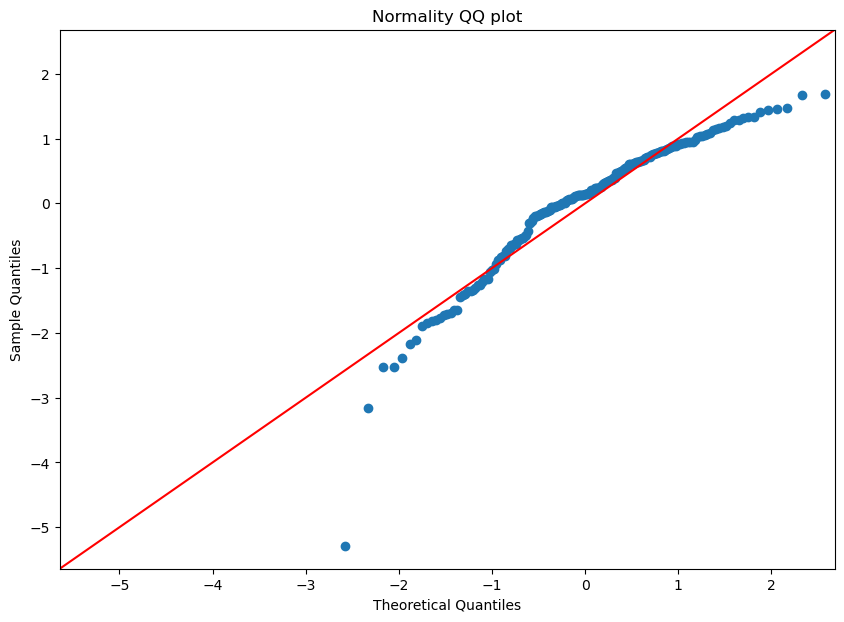

In [159]:
# check residuals normality plot
plt.rc("figure", figsize=(10,7))
sm.qqplot(model_glm.resid_pearson, fit=True, line="45")
plt.title('Normality QQ plot')
plt.show()

Lots of points are far away from the red line, meaning our model isn't good enough

## Issue : 
maybe two terms are correlated 

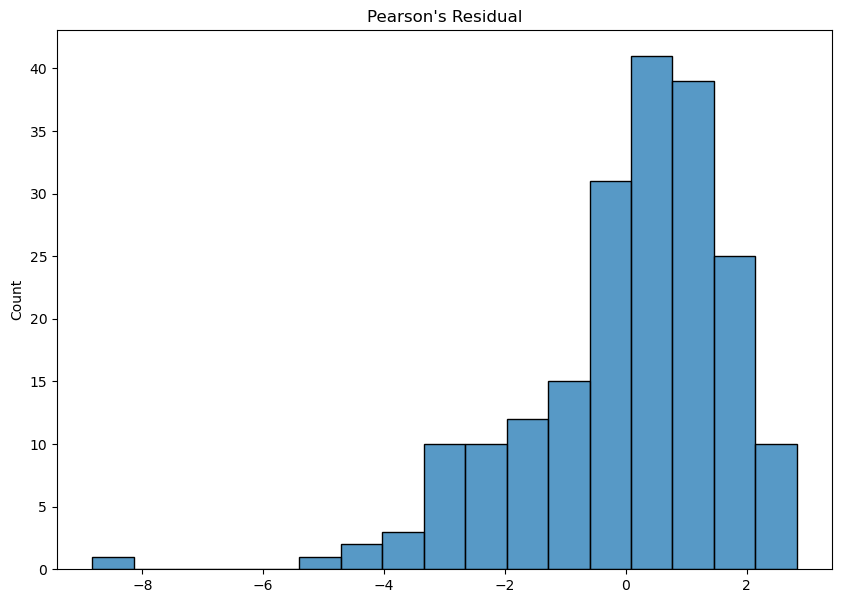

In [160]:
# check pearson's residuals distribution (histogram)
sns.histplot(model_glm.resid_pearson).set(title="Pearson's Residual");

Once again here, the maximum isn't located on the mean

In [161]:
diag_glm = model_glm.get_influence()

In [162]:
dir(diag_glm)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_diff_fittedvalues_one',
 '_fittedvalues_one',
 '_get_prediction',
 '_hat_matrix_diag',
 '_plot_index',
 '_res_looo',
 'cooks_distance',
 'cov_params',
 'd_fittedvalues',
 'd_fittedvalues_scaled',
 'd_linpred',
 'd_linpred_scaled',
 'd_params',
 'dfbetas',
 'endog',
 'exog',
 'hat_matrix_diag',
 'hessian',
 'k_vars',
 'model_class',
 'nobs',
 'params_one',
 'plot_index',
 'plot_influence',
 'resid',
 'resid_studentized',
 'results',
 'scale',
 'score_obs',
 'summary_frame']

In [163]:
diag_glm.summary_frame()

,dfb_Intercept,dfb_TV,dfb_radio,dfb_newspaper,cooks_d,standard_resid,hat_diag,dffits_internal
1,-0.085611,0.058133,0.023318,0.101412,5.797287e-03,0.947054,0.025203,0.152280
2,-0.033382,0.105444,-0.078845,-0.029553,6.673622e-03,-1.161042,0.019418,-0.163384
3,-0.001970,0.217565,-0.133960,-0.182994,3.382760e-02,-1.820490,0.039226,-0.367846
4,-0.024449,-0.001972,0.031425,0.035244,1.230165e-03,0.539752,0.016610,0.070147
5,-0.000894,-0.004637,0.017341,-0.020749,1.807925e-04,-0.173316,0.023509,-0.026892
...,...,...,...,...,...,...,...,...
196,0.192447,-0.113577,-0.102796,-0.026456,9.734341e-03,1.337164,0.021313,0.197326
197,0.109139,-0.034352,-0.059833,-0.040194,3.444021e-03,0.917931,0.016087,0.117372
198,0.000582,0.000261,-0.000361,-0.000508,2.485013e-07,0.008412,0.013854,0.000997
199,-0.129388,0.110980,0.050764,0.091285,9.039397e-03,1.044869,0.032057,0.190151


In [164]:
from statsmodels.stats.outliers_influence import OLSInfluence
diagnostics = OLSInfluence(resformula_3)

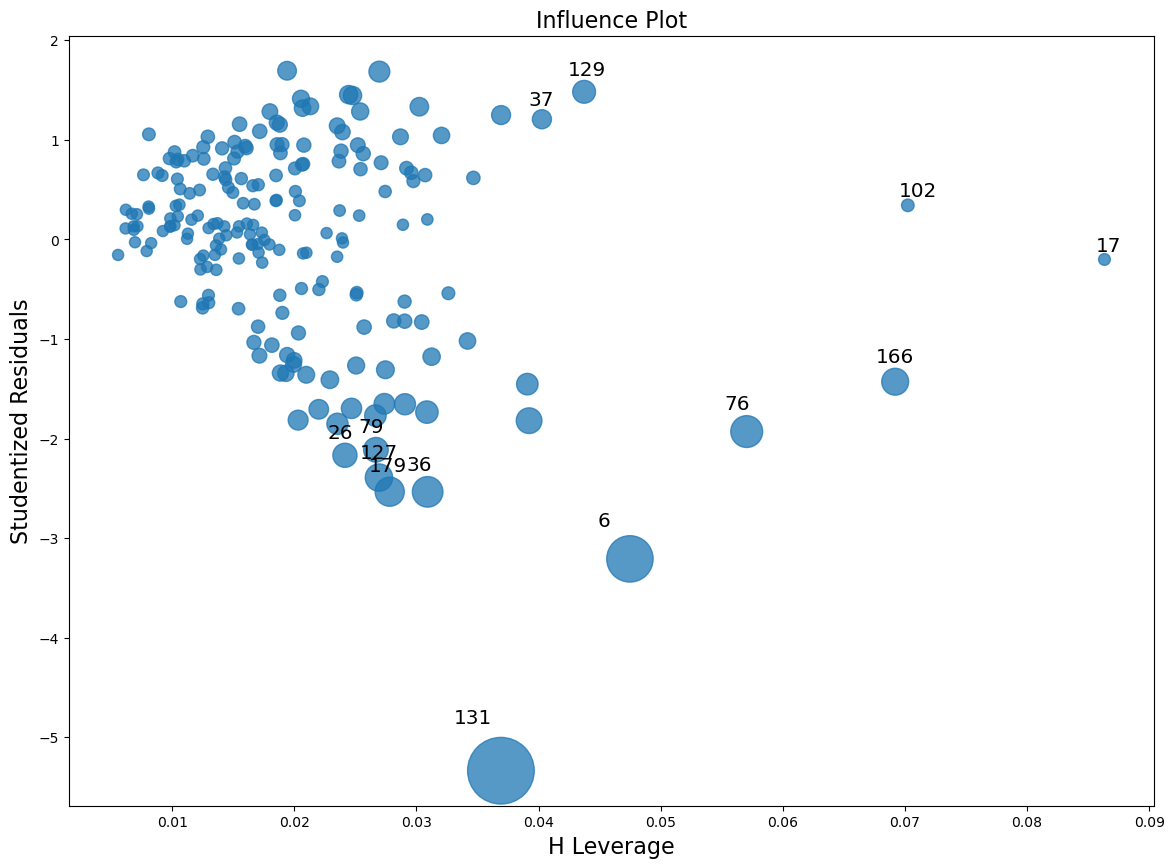

In [165]:
plt.rc("figure", figsize=(14,10))
diagnostics.plot_influence()
plt.show()

In [166]:
diagnostics.summary_frame()

,dfb_Intercept,dfb_TV,dfb_radio,dfb_newspaper,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
1,-0.085588,0.058118,0.023312,0.101385,5.797287e-03,0.947054,0.025203,0.152280,0.946804,0.152240
2,-0.033412,0.105538,-0.078916,-0.029579,6.673622e-03,-1.161042,0.019418,-0.163384,-1.162079,-0.163530
3,-0.001981,0.218867,-0.134762,-0.184090,3.382760e-02,-1.820490,0.039226,-0.367846,-1.831389,-0.370048
4,-0.024405,-0.001968,0.031368,0.035180,1.230165e-03,0.539752,0.016610,0.070147,0.538774,0.070020
5,-0.000892,-0.004626,0.017298,-0.020697,1.807925e-04,-0.173316,0.023509,-0.026892,-0.172887,-0.026825
...,...,...,...,...,...,...,...,...,...,...
196,0.192837,-0.113807,-0.103004,-0.026510,9.734341e-03,1.337164,0.021313,0.197326,1.339874,0.197725
197,0.109095,-0.034338,-0.059809,-0.040178,3.444021e-03,0.917931,0.016087,0.117372,0.917561,0.117324
198,0.000580,0.000260,-0.000360,-0.000507,2.485013e-07,0.008412,0.013854,0.000997,0.008390,0.000994
199,-0.129419,0.111007,0.050776,0.091306,9.039397e-03,1.044869,0.032057,0.190151,1.045115,0.190196


In [167]:
dir(diagnostics)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_get_drop_vari',
 '_ols_xnoti',
 '_plot_index',
 '_res_looo',
 'aux_regression_endog',
 'aux_regression_exog',
 'cooks_distance',
 'cov_ratio',
 'det_cov_params_not_obsi',
 'dfbeta',
 'dfbetas',
 'dffits',
 'dffits_internal',
 'endog',
 'ess_press',
 'exog',
 'get_resid_studentized_external',
 'hat_diag_factor',
 'hat_matrix_diag',
 'influence',
 'k_vars',
 'model_class',
 'nobs',
 'params_not_obsi',
 'plot_index',
 'plot_influence',
 'resid',
 'resid_press',
 'resid_std',
 'resid_studentized',
 'resid_studentized_external',
 'resid_studentized_internal',
 'resid_var',
 'results',
 'scale',
 'sigma2_not_obsi',

## Synergy

## 1. Explore synergy with the <Advertising.csv> data set
### a.	Start by creating three new variables : ln(TV), ln(TV) x radio, TV x radio

In [168]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [169]:
A = np.log(df['TV'])
B = A*(df['radio'])
C = df['TV']*df['radio']

In [170]:
df['lnTV'] = A
df['lnTV*radio'] = B
df['TV*radio'] = C

In [171]:
df

,TV,radio,newspaper,sales,lnTV,lnTV*radio,TV*radio
1,230.1,37.8,69.2,22.1,5.438514,205.575829,8697.78
2,44.5,39.3,45.1,10.4,3.795489,149.162725,1748.85
3,17.2,45.9,69.3,9.3,2.844909,130.581341,789.48
4,151.5,41.3,58.5,18.5,5.020586,207.350186,6256.95
5,180.8,10.8,58.4,12.9,5.197391,56.131828,1952.64
...,...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,3.642836,13.478491,141.34
197,94.2,4.9,8.1,9.7,4.545420,22.272559,461.58
198,177.0,9.3,6.4,12.8,5.176150,48.138193,1646.10
199,283.6,42.0,66.2,25.5,5.647565,237.197721,11911.20


### b.	Then predict sales with all the variables

In [172]:
X = df[['TV', 'radio', 'newspaper', 'lnTV','lnTV*radio', 'TV*radio']]
model_3 = sm.OLS(y, sm.add_constant(X)).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     9734.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          1.36e-236
Time:                        11:25:10   Log-Likelihood:                -42.110
No. Observations:                 200   AIC:                             98.22
Df Residuals:                     193   BIC:                             121.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1854      0.349     -0.531      0.5

### Model description

- Pertinence of regression : P. value of F < alpha (1.36e-236 < 0.5) -> regression is pertinent 

#### pertinence of predictors :
- TV & ln(TV)*radio are non significants (t value < 0)
- newspaper isn't pertinent here (P. value of t > alpha)
- ln(TV) and TV*radio are < alpha -> both factors are very pertinent here

#### sales prediction : 
- when we increase ln(TV) budget by one unit (10k€), sales will increase by 2,0708 units (207 080€)
- when we increase TV x Radio budget by one unit (10k€), sales will increase by by 0,0011 units (110€)

### c.	Implement a model selection using the RMSE, the AIC and or the BIC

#### For all 6 variables 
##### AIC & BIC

- AIC of the model : 98.22
- BIC of the model : 121.3

We have very low AIC and BIC, hence our model is very parcimonious

##### RMSE 

In [173]:
X = df[['TV', 'radio', 'newspaper', 'lnTV','lnTV*radio', 'TV*radio']]
Y = df[['sales']]

model = sm.OLS(y, sm.add_constant(X)).fit()

# calculate the predicted value
y_pred = model.predict(sm.add_constant(X))

# calculate the RMSE 
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(rmse)

0.2986777737035024


We have a low RMSE
##### However, we need to get rid of the non-pertinent variables and find a model where all predictors are pertinent.

#### For the 3 new variables

In [174]:
X = df[['lnTV', 'lnTV*radio', 'TV*radio']]
model_5 = sm.OLS(y, sm.add_constant(X)).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.542e+04
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          2.15e-232
Time:                        11:25:10   Log-Likelihood:                -66.906
No. Observations:                 200   AIC:                             141.8
Df Residuals:                     196   BIC:                             155.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2156      0.149      8.139      0.0

In [175]:
X = df[['lnTV','lnTV*radio', 'TV*radio']]
Y = df[['sales']]

model = sm.OLS(y, sm.add_constant(X)).fit()

y_pred = model.predict(sm.add_constant(X))

# calculate the RMSE 
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(rmse)

0.3381013534108714


##### We have here very low AIC (141), BIC (155), and RMSE (0.33) ; plus, all predictors are pertinent. This model seems to be the most efficient.

#### For 2 variables

In [176]:
X = df[['lnTV', 'TV*radio']]
model_7 = sm.OLS(y, sm.add_constant(X)).fit()
print(model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.150e+04
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          1.05e-204
Time:                        11:25:11   Log-Likelihood:                -136.85
No. Observations:                 200   AIC:                             279.7
Df Residuals:                     197   BIC:                             289.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3839      0.176     13.561      0.0

##### We have higher AIC and BIC than in our previous model ; let's keep 3 variables. 

### d.	Check the performance of your model (proportion of variance explained)

R-squared : 0.996 - we are very close to the mean, hence the model selected is very performant

### e.	Check your residuals

In [177]:
model_glm_2 = glm('sales ~ lnTV + lnTV*radio + TV*radio', data=df, family=sm.families.Gaussian()).fit()
model_glm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  sales   No. Observations:                  200
Model:                            GLM   Df Residuals:                      194
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                        0.091973
Method:                          IRLS   Log-Likelihood:                -42.116
Date:                Wed, 22 Feb 2023   Deviance:                       17.843
Time:                        11:25:12   Pearson chi2:                     17.8
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1851      0.348     -0.531      0.595      -0.868       0.497
lnTV           2.0713      0.104     19.991      0.000       1.868       2.274
radio          0.0612      0.011      5.626      0.000       0.040       0.083
lnTV:radio    -0.0046      0.003     -1.387      0.165      -0.011       0.002
TV            -0.0008      0.001     -0.694      0.488      -0.003       0.001
TV:radio       0.0011   3.76e-05     28.303      0.000       0.001       0.001
==============================================================================
"""

In [179]:
# calculate standardized residuals
fitted_values = model_glm_2.fittedvalues
std_residuals = model_glm_2.resid_pearson

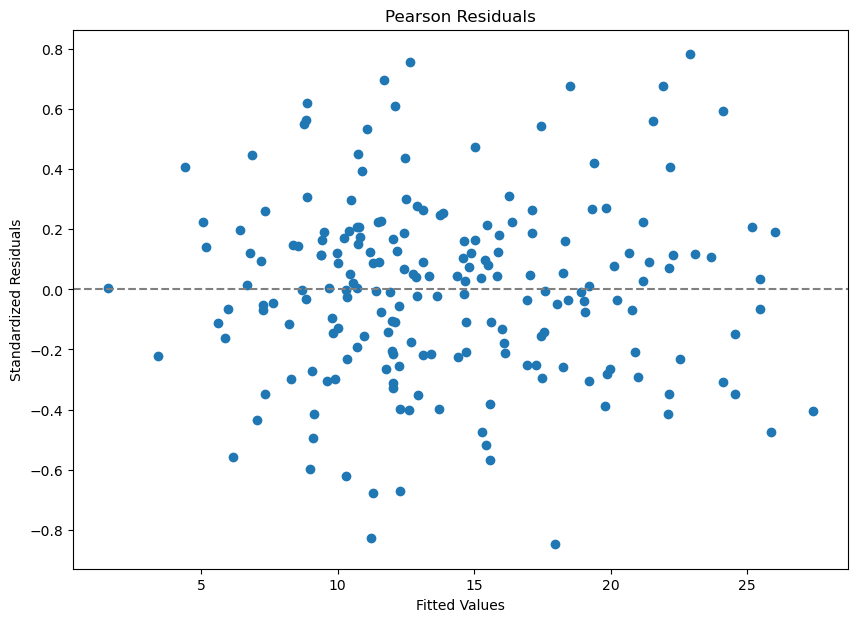

In [180]:
# plot standardized residuals
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(fitted_values, std_residuals)
ax.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Pearson Residuals')
plt.show()

##### The plot doesn't print a shape here, meaning our model is pertinent !

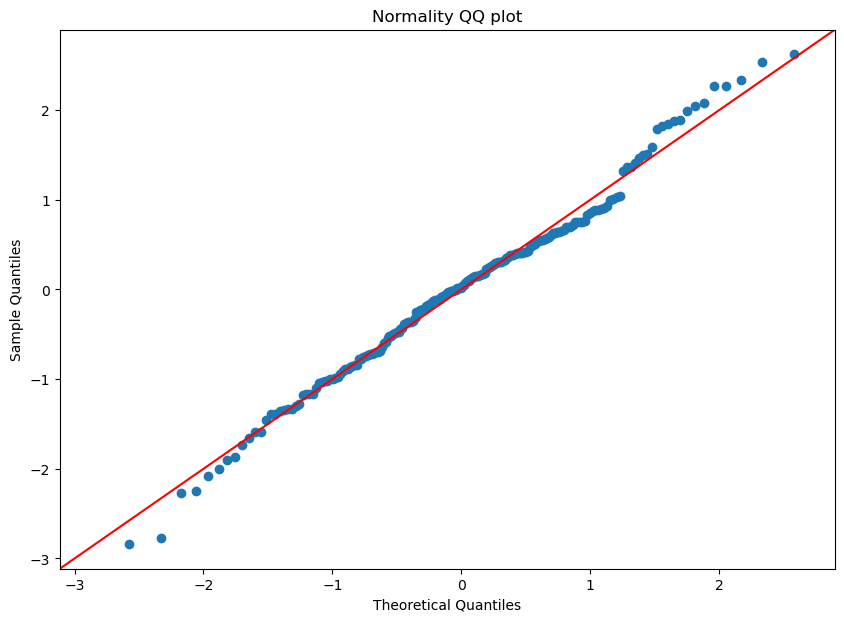

In [181]:
# check residuals normality plot
plt.rc("figure", figsize=(10,7))
sm.qqplot(model_glm_2.resid_pearson, fit=True, line="45")
plt.title('Normality QQ plot')
plt.show()

##### Dots are very close to the red line, confirming our model is pertinent 

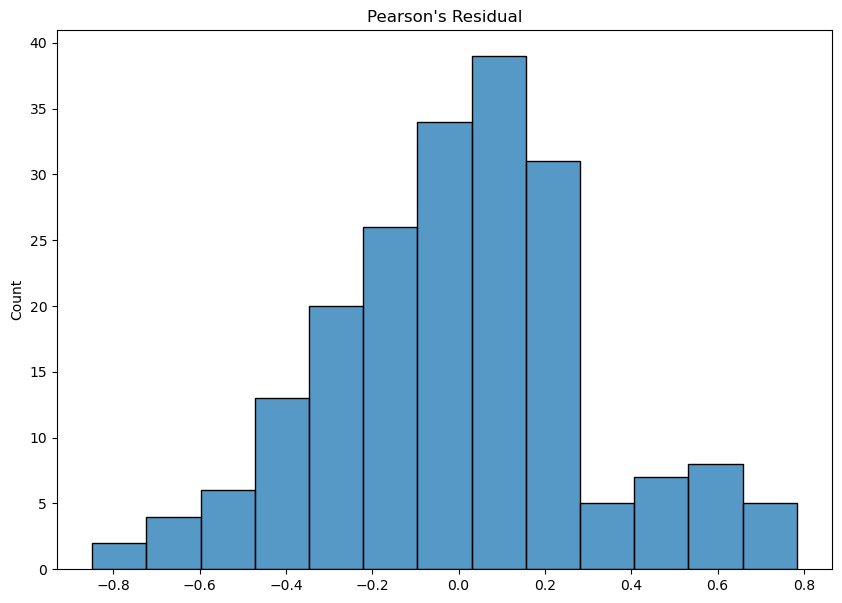

In [182]:
# check pearson's residuals distribution (histogram)
sns.histplot(model_glm_2.resid_pearson).set(title="Pearson's Residual");

##### This histogram follows a gaussian distribution, with a max reached very close from the median. Our model is indeed pertinent.

### f.	What do you think of the Collinearity statistics ?

All the above graphs and details proved that variables aren't correlated ; in our model, there is no colinearity between our variables.